In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('topic-model-lsa-shreyawohooo-lemmatized.csv')
df.head()

,Abstract,Year,Topic 0 score,Topic 1 score,Topic 2 score,Topic 3 score,Topic 4 score,Topic 5 score,Topic 6 score,Topic 7 score,Topic 8 score,Topic 9 score,Topic
0,A transfer and coating apparatus transfers a c...,2019,1.55,-1.13,0.42,0.62,-0.20,-0.02,0.58,-0.22,0.05,1.02,0
1,An example apparatus includes an input buffer ...,2021,4.63,0.41,0.65,3.90,6.06,-4.04,-2.11,2.83,-1.25,-0.10,4
2,Provided is a container including a container ...,2018,1.62,-1.51,0.28,1.54,-1.15,0.07,0.29,-0.31,0.40,1.31,0
3,In accordance with one or more embodiments her...,2018,3.78,2.10,2.98,0.02,-0.51,2.64,-0.34,0.59,-0.54,-0.24,0
4,"A drive voltage supply circuit, a display pane...",2020,2.22,-0.87,-0.72,0.80,1.82,0.50,-1.93,-1.94,-1.29,-1.16,0


In [3]:
df['Topic'].value_counts()

0    1034346
6     181282
3      55045
9      51791
5      48114
4      45051
8      34907
2      22624
7      12856
1        346
Name: Topic, dtype: int64

<Figure size 864x720 with 0 Axes>

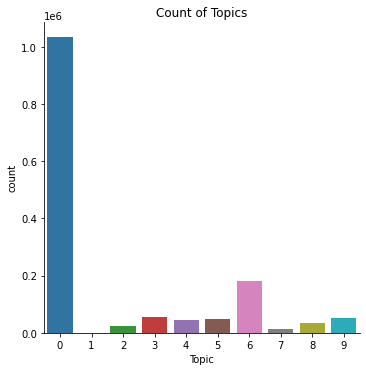

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(12, 10))
sns.catplot(x = "Topic", data = df, kind = "count")
plt.title('Count of Topics')
plt.show()

In [5]:
labels ={}
for i in df['Topic']:
    labels[i] = labels.get(i,0) + 1
labels

{0: 1034346,
 4: 45051,
 9: 51791,
 6: 181282,
 5: 48114,
 8: 34907,
 3: 55045,
 7: 12856,
 2: 22624,
 1: 346}

In [6]:
df_topics = pd.DataFrame(list(labels.items()), columns = ['Topic', 'Count'])
df_topics

,Topic,Count
0,0,1034346
1,4,45051
2,9,51791
3,6,181282
4,5,48114
5,8,34907
6,3,55045
7,7,12856
8,2,22624
9,1,346


In [7]:
df.iloc[:,1:11]

,Year,Topic 0 score,Topic 1 score,Topic 2 score,Topic 3 score,Topic 4 score,Topic 5 score,Topic 6 score,Topic 7 score,Topic 8 score
0,2019,1.55,-1.13,0.42,0.62,-0.20,-0.02,0.58,-0.22,0.05
1,2021,4.63,0.41,0.65,3.90,6.06,-4.04,-2.11,2.83,-1.25
2,2018,1.62,-1.51,0.28,1.54,-1.15,0.07,0.29,-0.31,0.40
3,2018,3.78,2.10,2.98,0.02,-0.51,2.64,-0.34,0.59,-0.54
4,2020,2.22,-0.87,-0.72,0.80,1.82,0.50,-1.93,-1.94,-1.29
...,...,...,...,...,...,...,...,...,...,...
1486357,2018,2.71,0.41,0.59,-0.46,0.95,-0.05,2.03,0.76,0.59
1486358,2022,3.23,0.42,0.32,1.19,1.04,1.31,-0.33,-0.67,2.78
1486359,2018,3.13,1.42,-1.97,-0.80,-0.37,-0.77,-0.02,0.25,-0.00
1486360,2020,1.85,-1.56,0.26,0.89,0.81,-1.27,-0.26,-0.11,-0.01


In [8]:
X = df.iloc[:,1:11].to_numpy().tolist()
X[:5]

[[2019.0, 1.55, -1.13, 0.42, 0.62, -0.2, -0.02, 0.58, -0.22, 0.05],
 [2021.0, 4.63, 0.41, 0.65, 3.9, 6.06, -4.04, -2.11, 2.83, -1.25],
 [2018.0, 1.62, -1.51, 0.28, 1.54, -1.15, 0.07, 0.29, -0.31, 0.4],
 [2018.0, 3.78, 2.1, 2.98, 0.02, -0.51, 2.64, -0.34, 0.59, -0.54],
 [2020.0, 2.22, -0.87, -0.72, 0.8, 1.82, 0.5, -1.93, -1.94, -1.29]]

In [9]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components = 2, learning_rate='auto', init='random', n_jobs = -1).fit_transform(np.array(X))

print(X_tsne)

[[-87.42674  -19.892433]
 [-25.50848  -20.152943]
 [ 52.83264  -53.883785]
 ...
 [ 33.11114   36.053844]
 [ 63.75661   47.39134 ]
 [ 78.96596  -15.019377]]


In [10]:
len(X_tsne)

1486362

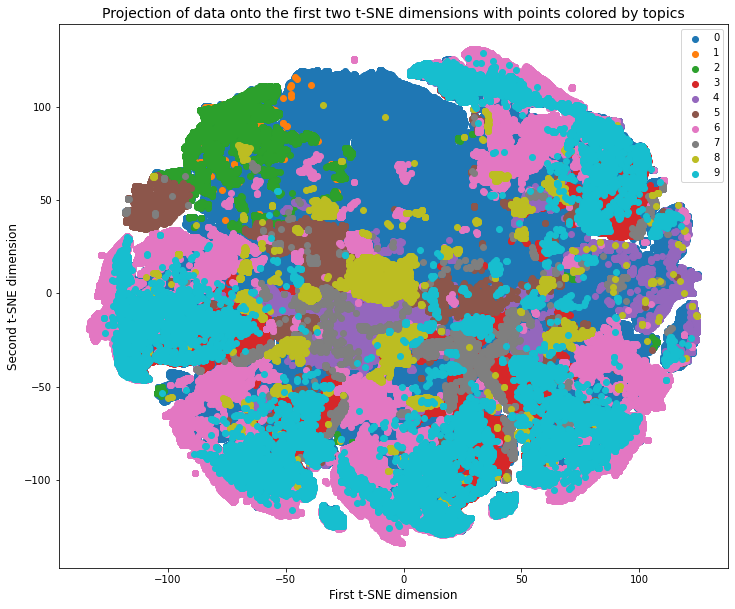

In [12]:
plt.figure(figsize=(12, 10))
for topics in np.unique(df['Topic']):
    x = X_tsne[(df['Topic'] == topics),0]
    y = X_tsne[(df['Topic'] == topics),1]
    plt.scatter(x, y, label = topics)
plt.xlabel('First t-SNE dimension', fontsize = 12)
plt.ylabel('Second t-SNE dimension', fontsize = 12)
plt.title('Projection of data onto the first two t-SNE dimensions with points colored by topics',
          fontsize = 14)
plt.legend()
plt.show()